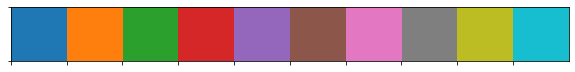

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, make_scorer, confusion_matrix
import seaborn as sns
from statsmodels.stats.proportion import proportions_chisquare
from scipy.stats import chisquare
import pickle
from bs4 import BeautifulSoup
from collections import defaultdict
import requests
from statsmodels.stats.multitest import fdrcorrection_twostage
%matplotlib inline
# Imports
%matplotlib inline

import os
import numpy as np
import pandas as pd
import numpy.random as rand
from itertools import islice
from sklearn.ensemble import (GradientBoostingRegressor, 
                              GradientBoostingClassifier, 
                              AdaBoostClassifier,
                              RandomForestClassifier,
                             RandomForestRegressor)
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
import math
import sklearn.datasets as datasets
# import sklearn.cross_validation as cv
import sklearn.model_selection as cv
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import log_loss, make_scorer, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

current_palette = sns.color_palette()
sns.palplot(current_palette)

from pylab import rcParams
rcParams['figure.figsize'] = (12, 8)

## Load Training Data 

In [3]:
df_train = pd.read_csv('drugsCom_raw/drugsComTrain_raw.tsv',sep='\t',index_col=0)

In [4]:

df_train[['condition','review']]
#df_train['condition'].str.contains('span')

,condition,review
206461,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati..."
95260,ADHD,"""My son is halfway through his fourth week of ..."
92703,Birth Control,"""I used to take another oral contraceptive, wh..."
138000,Birth Control,"""This is my first time using any form of birth..."
35696,Opiate Dependence,"""Suboxone has completely turned my life around..."
155963,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard..."
165907,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t..."
102654,Bipolar Disorde,"""Abilify changed my life. There is hope. I was..."
74811,Epilepsy,""" I Ve had nothing but problems with the Kepp..."
48928,Birth Control,"""I had been on the pill for many years. When m..."


In [5]:
def create_rating_label(df):
    if df['rating'] >= 7: 
        return 'high'
    elif (df['rating'] < 4):
        return 'low'
    else :
        return 'neutral'

In [6]:
df_train['label']=df_train.apply(create_rating_label, axis=1)

In [7]:
df_train.head()

,drugName,condition,review,rating,date,usefulCount,label
206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,high
95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,high
92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,neutral
138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,high
35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,high


In [8]:
df_train['condition']

206461    Left Ventricular Dysfunction
95260                             ADHD
92703                    Birth Control
138000                   Birth Control
35696                Opiate Dependence
155963    Benign Prostatic Hyperplasia
165907         Emergency Contraception
102654                 Bipolar Disorde
74811                         Epilepsy
48928                    Birth Control
29607              Migraine Prevention
75612                       Depression
191290                 Crohn's Disease
221320                           Cough
98494                    Birth Control
81890                          Obesity
48188          Urinary Tract Infection
219869                     ibromyalgia
212077                 Bipolar Disorde
119705    Chronic Myelogenous Leukemia
12372                    HIV Infection
231466                        Insomnia
227020                   Birth Control
41928             Rheumatoid Arthritis
213649         Vaginal Yeast Infection
51215              Chlamy

In [9]:
##df_train.groupby(['condition','drugName','label']).count()
## 10 most common condtions & drug reviews breakdown
## Most reviewed drugs 

### Most Reviwed Conditions

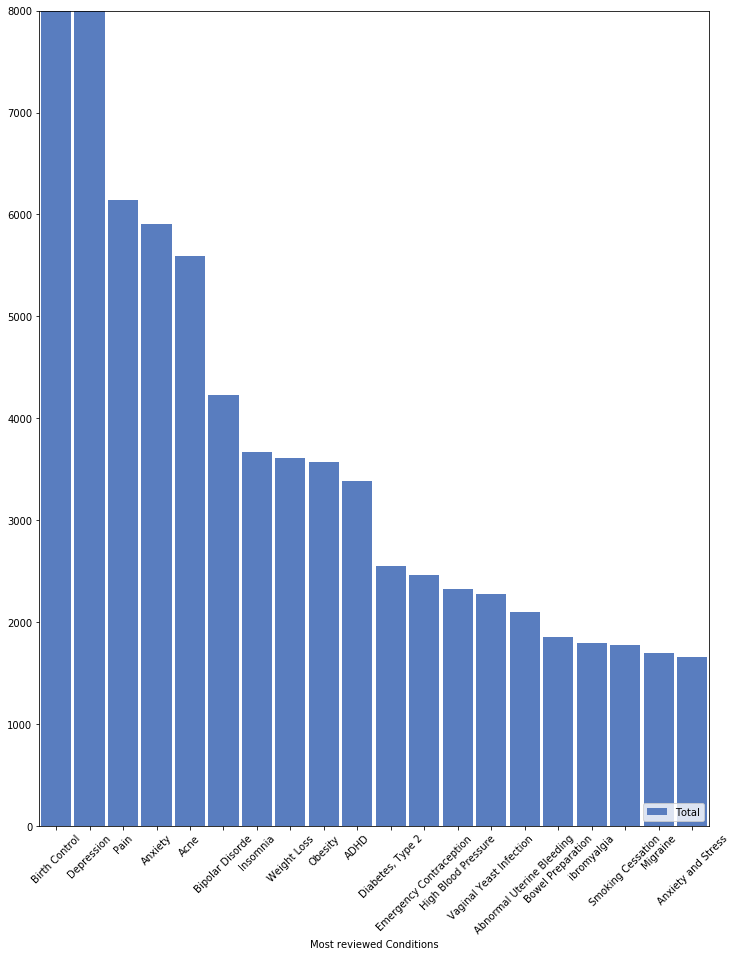

In [10]:
##Top  Condition based on reviews , 
#top 10 postively reviwed drugs 
# Top 10 negatively reviwed drugs 


def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)



## Top 12 conditions based on reviews 
f, ax = plt.subplots(figsize=(12, 15))
df_tp_cond=df_train.groupby(['condition']) \
                   .count() \
                   .reset_index() \
                   .sort_values(['review'], ascending=False) \
                   .head(20)

sns.set_color_codes("muted")
ax=sns.barplot(x="condition", y="review", data=df_tp_cond,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylim=(0, 8000),ylabel="",
       xlabel="Most reviewed Conditions")
plt.xticks(rotation=45)
change_width(ax, 0.90)
#sns.despine(left=True, bottom=True)


## Least Reviewed Conditions 

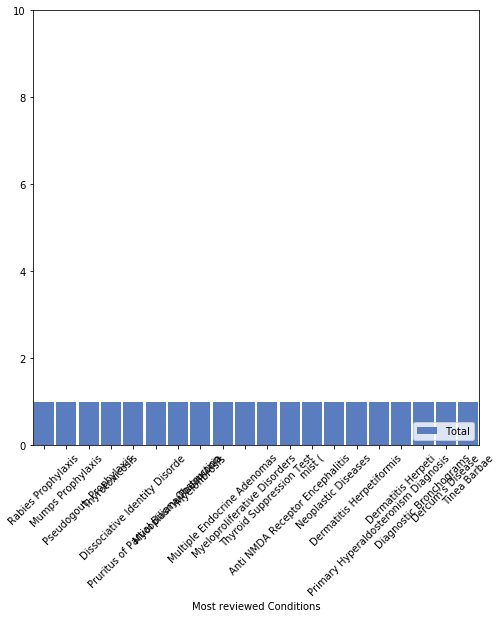

In [11]:
##Top  Condition based on reviews , 
#top 10 postively reviwed drugs 
# Top 10 negatively reviwed drugs 


def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)



## Top 12 conditions based on reviews 
f, ax = plt.subplots(figsize=(8, 8))
df_tp_cond=df_train.groupby(['condition']) \
                   .count() \
                   .reset_index() \
                   .sort_values(['review'], ascending=True) \
                   .head(20)

sns.set_color_codes("muted")
ax=sns.barplot(x="condition", y="review", data=df_tp_cond,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylim=(0, 10),ylabel="",
       xlabel="Most reviewed Conditions")
plt.xticks(rotation=45)
change_width(ax, 0.90)
#sns.despine(left=True, bottom=True)

In [12]:
#top 10 postively reviwed drugs 
# Top 10 negatively reviwed drugs 

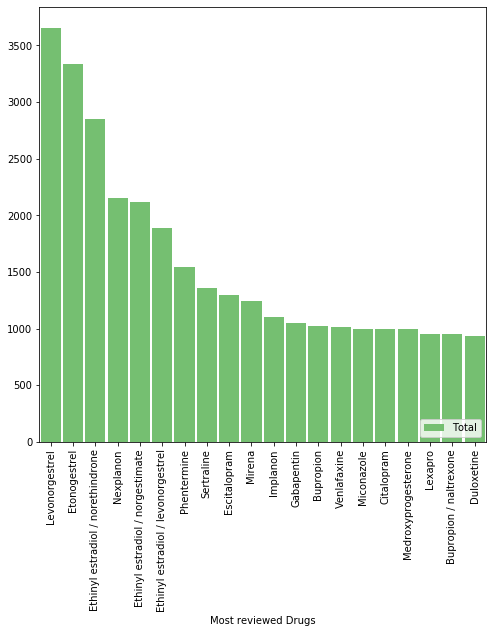

In [13]:
##Top  Condition based on reviews , 
#top 10 postively reviwed drugs 
# Top 10 negatively reviwed drugs 


def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)



## Top 12 conditions based on reviews 
f, ax = plt.subplots(figsize=(8, 8))
df_tp_cond=df_train.groupby(['drugName']) \
                   .count() \
                   .reset_index() \
                   .sort_values(['review'], ascending=False) \
                   .head(20)

sns.set_color_codes("muted")
ax=sns.barplot(x="drugName", y="review", data=df_tp_cond,
            label="Total", color="g")

# Plot the crashes where alcohol was involved
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Most reviewed Drugs")
plt.xticks(rotation=90)
change_width(ax, 0.90)
#sns.despine(left=True, bottom=True)

### Most Positively Reviewed drugs 

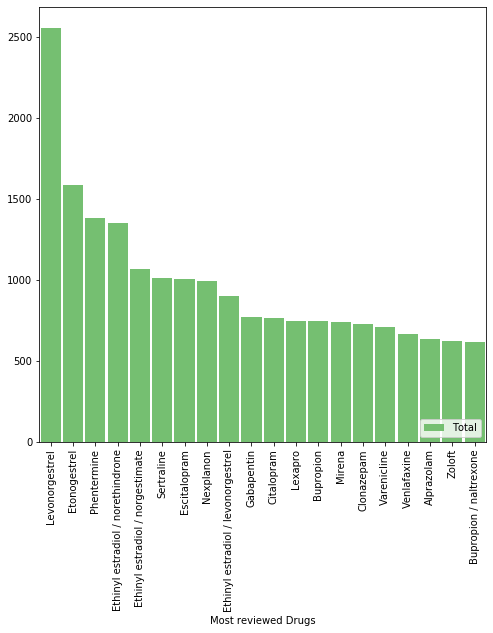

In [14]:
##Top  Condition based on reviews , 
#top 10 postively reviwed drugs 
# Top 10 negatively reviwed drugs 


def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)



## Top 12 conditions based on reviews 
f, ax = plt.subplots(figsize=(8, 8))
df_tp_cond=df_train[df_train['label']=='high'].groupby(['drugName']) \
                   .count() \
                   .reset_index() \
                   .sort_values(['review'], ascending=False) \
                   .head(20)

sns.set_color_codes("muted")
ax=sns.barplot(x="drugName", y="review", data=df_tp_cond,
            label="Total", color="g")

# Plot the crashes where alcohol was involved
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Most reviewed Drugs")
plt.xticks(rotation=90)
change_width(ax, 0.90)
#sns.despine(left=True, bottom=True)

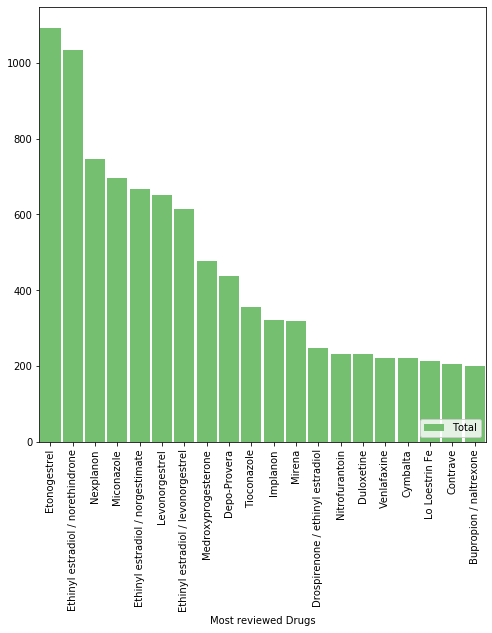

In [15]:
##Top  Condition based on reviews , 
#top 10 postively reviwed drugs 
# Top 10 negatively reviwed drugs 


def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)



## Top 12 conditions based on reviews 
f, ax = plt.subplots(figsize=(8, 8))
df_tp_cond=df_train[df_train['label']=='low'].groupby(['drugName']) \
                   .count() \
                   .reset_index() \
                   .sort_values(['review'], ascending=False) \
                   .head(20)

sns.set_color_codes("muted")
ax=sns.barplot(x="drugName", y="review", data=df_tp_cond,
            label="Total", color="g")

# Plot the crashes where alcohol was involved
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Most reviewed Drugs")
plt.xticks(rotation=90)
change_width(ax, 0.90)
#sns.despine(left=True, bottom=True)

In [34]:
### Most Reviewed Drugs by condition 
df_train[df_train['condition'].str.contains('span')==False]

,drugName,condition,review,rating,date,usefulCount,label
206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,high
95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,high
92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,neutral
138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,high
35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,high
155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2.0,"November 28, 2015",43,low
165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1.0,"March 7, 2017",5,low
102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10.0,"March 14, 2015",32,high
74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1.0,"August 9, 2016",11,low
48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8.0,"December 8, 2016",1,high


In [38]:
top_50_drg=df_train.groupby(['drugName']) \
                   .count() \
                   .reset_index() \
                   .sort_values(['review'], ascending=False) \
                   .head(10)
top_50_drg_lst=list(top_50_drg['drugName'])
top_50_drg_df=df_train[(df_train['condition'].str.contains('span')==False) & (df_train["drugName"].isin(top_50_drg_lst))]

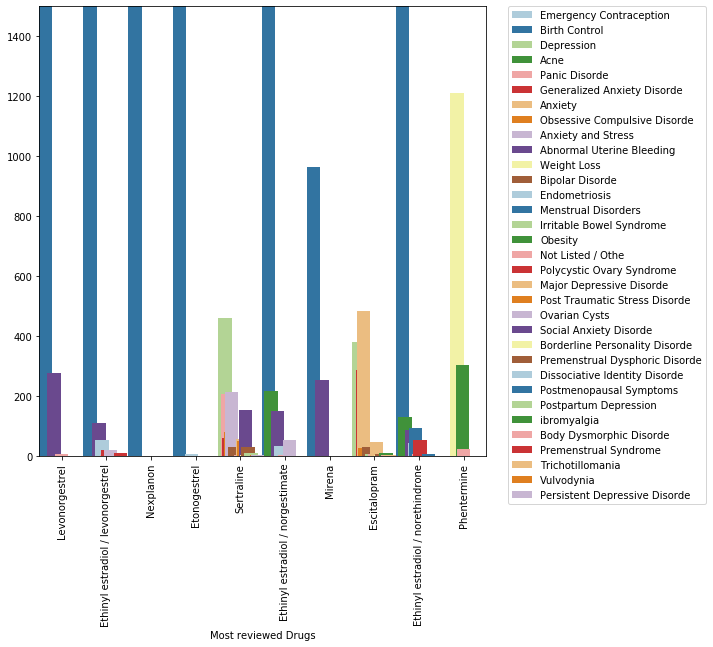

In [50]:
## Data Frame for top 20 drug reviews 
df_train[df_train["drugName"].isin(top_50_drg_lst)]
ax = (8, 8.27)
fig, ax = plt.subplots(figsize=ax)
ax=sns.countplot(x="drugName",hue='condition',palette='Paired',
                 data=top_50_drg_df)
change_width(ax,0.90)
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylim=(0, 1500),ylabel="",
       xlabel="Most reviewed Drugs")
#g.set(ylim=(0, None))
plt.xticks(rotation=90)
change_width(ax, 0.30)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [57]:
top_50_cond=df_train.groupby(['condition']) \
                   .count() \
                   .reset_index() \
                   .sort_values(['review'], ascending=False) \
                   .head(5)
top_50_cond_lst=list(top_50_drg['condition'])
top_50_cond_df=df_train[df_train["condition"].isin(top_50_drg_lst)]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

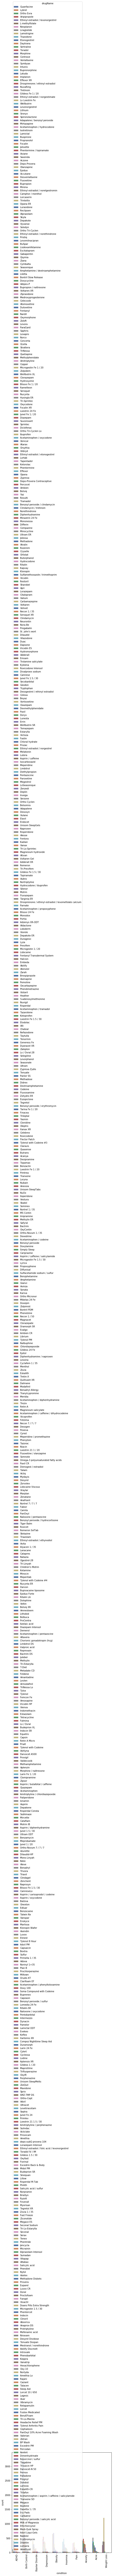

In [62]:
#df_tp_cond=df_train.groupby(['condition','drugName']) \
#                   .count() \
#                   .reset_index() \
#                   .sort_values(['review'], ascending=False) \
#                   .head(20)
ax = (8, 8.27)
fig, ax = plt.subplots(figsize=ax)
ax=sns.countplot(x="condition", hue='drugName',palette="deep",
                 data=top_50_cond_df)
change_width(ax,0.10)
plt.xticks(rotation=90)

In [ ]:
ax = (11.7, 8.27)
fig, ax = plt.subplots(figsize=ax)
ax=sns.countplot(x="hour", hue='source',palette="deep",data=ride_lyft_pm[ride_lyft_pm['dayofweek'].isin([5, 6])]
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .25)
plt.xlabel('Hours',size=20)
plt.ylabel(" Day Ride Count",fontsize=20)
plt.title('Weekend Evening Lyft Ride counts',fontsize=20)
plt.savefig('WeekendEveningLyftRidecounts')
plt.show()

In [ ]:
df_train['label']=df_train.apply(create_rating_label, axis=1)

In [ ]:
df_test['label']=df_test.apply(create_rating_label, axis=1)

In [ ]:
df_train['label'].value_counts()/len(df_train['label'])

In [ ]:
#df_test['label'].value_counts()/len(df_test['label'])

In [ ]:
df_train.groupby(['condition','label']).count()

# 2. NLP

## 2.1 Sentiment Analysis
### 2.1.1 Vectorizerization of words using tf-idf

In [14]:
df_train.shape

(161297, 7)

In [15]:
df_test.shape

(53766, 7)

## Step -1 Change all the text to ASCII , Remove stop words and punctuation and Lemmatise

In [16]:
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

punctuation_ = string.punctuation+'``'+"''"+'...'+''#039
stopwords_ = set(stopwords.words('english'))
stemmer_porter = PorterStemmer()


def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    only_ascii = nfkd_form.encode('ASCII', 'ignore')
    return only_ascii.decode()

def filter_stop_punct(tokenised_word):
    w_list=[]
    for w in tokenised_word: 
        if (w not in stopwords_) and (w not in punctuation_):
            w_list.append(w.lower())
    return w_list

def nlp_pipeline(df):
    review_lst=[]
    filtered_text=[]
    tokens_stemporter_lst=[]
    for review in df['review'][:1]:
        input_string = remove_accents(review)
        tokenised_word=word_tokenize(input_string)
        tokenised_word_fltr=filter_stop_punct(tokenised_word)
        #print(tokenised_word_fltr)
        tokens_stemporter = list(map(stemmer_porter.stem, tokenised_word_fltr))
        tokens_stemporter_lst.append(tokens_stemporter)           
    return tokens_stemporter_lst   #review_lst.append(stopwords1)

In [17]:
def nlp_pipeline(df):
    review_lst=[]
    filtered_text=[]
    tokens_stemporter_lst=[]
    for review in df['review'][:10]:
        input_string = remove_accents(review)
        tokenised_word=word_tokenize(input_string)
        tokenised_word_fltr=filter_stop_punct(tokenised_word)
        
    return tokenised_word_fltr   #review_lst.append(stopwords1)

## Creating tfidf for review data 

### for Train data

In [79]:
stemmer = SnowballStemmer('english')

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    text = "".join([ch for ch in text if ch not in string.punctuation])
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english',tokenizer=tokenize,max_features= 20000)
X_train = tfidf.fit_transform(df_train['review'])
X_test = tfidf.transform(df_test['review'])

In [93]:
##Topic Modelling to see which feactures work the best 
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=0, algorithm='randomized', n_iter=10, random_state=1)

svd_model.fit(X_train)

len(svd_model.components_)

10

array([[ 2.92105821e-03,  6.99888181e-05,  2.46104816e-05, ...,
         2.44247391e-05,  3.74316642e-05,  4.59128681e-05],
       [ 1.31742444e-04, -3.58018075e-05, -2.52235319e-06, ...,
         1.57071750e-05, -4.35542883e-05, -2.05944572e-05],
       [-4.16800430e-05,  2.06639884e-05, -3.05380358e-05, ...,
         5.29432166e-05,  1.46847043e-05, -2.49181199e-05],
       ...,
       [-9.81981117e-04, -2.41475537e-05, -8.32552310e-05, ...,
        -9.00359529e-05, -9.44106699e-06,  9.85083808e-05],
       [-8.97794683e-04,  1.27625218e-04, -2.60723014e-05, ...,
         8.77487588e-05, -9.33154708e-05, -4.01279089e-05],
       [-4.33622786e-04,  1.05746205e-05, -3.90048097e-06, ...,
         6.49542459e-05,  5.84540291e-06,  1.89629059e-04]])

In [95]:
terms = tfidf.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
        print(" ")

Topic 0: 
day
 
month
 
period
 
work
 
week
 
effect
 
i039m
 
Topic 1: 
period
 
pill
 
birth
 
month
 
control
 
bleed
 
gain
 
Topic 2: 
pain
 
cramp
 
day
 
insert
 
period
 
hour
 
relief
 
Topic 3: 
work
 
great
 
acn
 
use
 
pain
 
medicin
 
control
 
Topic 4: 
work
 
day
 
pill
 
great
 
hour
 
took
 
use
 
Topic 5: 
use
 
acn
 
skin
 
clear
 
face
 
product
 
dri
 
Topic 6: 
weight
 
gain
 
lost
 
pound
 
eat
 
effect
 
lbs
 
Topic 7: 
sleep
 
help
 
night
 
pill
 
i039m
 
feel
 
weight
 
Topic 8: 
effect
 
pill
 
veri
 
medic
 
control
 
help
 
took
 
Topic 9: 
sleep
 
help
 
night
 
year
 
month
 
mg
 
gain
 


### for Test data


In [90]:
y_train = df_train['label']
y_test = df_test['label']

print(X_train.shape)
print(X_test.shape)

(53766, 39512)
(53766, 39512)


In [75]:
Y_train=df_train['label']
Y_test=df_test['label']

In [ ]:
#### Testing others code 

In [84]:
#con_vec = TfidfVectorizer(stop_words='english',tokenizer=tokenize)
#X_train1 = con_vec.fit_transform(df_train['review'])
#X_test1 = con_vec.transform(df_test['review'])


/Volumes/Disk2/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [86]:
print(X_train1.shape)
print(X_test1.shape)

(161297, 68005)
(53766, 68005)


## Modelling 

###  Random Forest 

In [88]:
rf = RandomForestClassifier(oob_score=True,n_estimators=20,random_state=0)
rf.fit(X_train,Y_train)
rf_pred = rf.predict(X_test)
print(rf.score(X_test, Y_test))
##0.8777480191942864  ##n_estimators=20 ## with all the features before restricting the number of 

/Volumes/Disk2/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Volumes/Disk2/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.8777480191942864


### Confusion Matrix for Random Forest Classifier 


In [108]:
rfcm=confusion_matrix(Y_test,rf_pred)
rfcm

In [186]:
print(classification_report(Y_test, rf_pred))

              precision    recall  f1-score   support

        high       0.85      0.99      0.92     35440
         low       0.94      0.69      0.80     11838
     neutral       0.99      0.59      0.74      6488

    accuracy                           0.88     53766
   macro avg       0.93      0.76      0.82     53766
weighted avg       0.89      0.88      0.87     53766



In [134]:
#df_train['label'].value_counts(normalize=True)
#df_test['label'].value_counts()
list(df_test['label'].unique())
#high       0.662542
#low        0.217382
#neutral    0.120077

['high', 'neutral', 'low']

In [151]:
labels=rfcm
labels

array([[35135,   294,    11],
       [ 3618,  8198,    22],
       [ 2387,   241,  3860]])

              precision    recall  f1-score   support

        high       0.70      0.99      0.82     35440
         low       0.80      0.23      0.35     11838
     neutral       0.53      0.00      0.00      6488

    accuracy                           0.70     53766
   macro avg       0.68      0.41      0.39     53766
weighted avg       0.70      0.70      0.62     53766



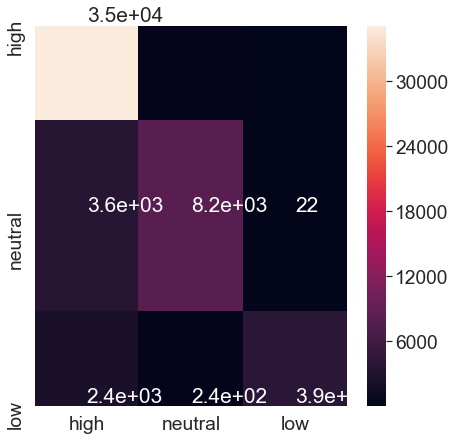

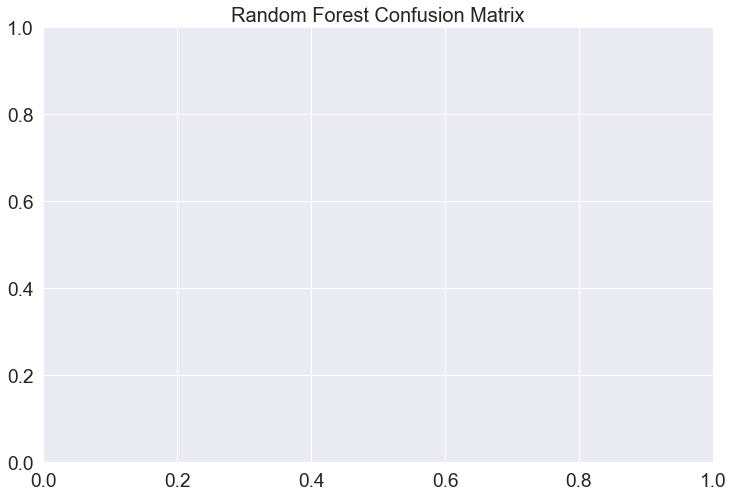

In [185]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
df_cm = pd.DataFrame(rfcm, index = list(df_test['label'].unique()),
                  columns = list(df_test['label'].unique()))
sns.set(font_scale = 1.75)
annot_kws = {"ha": 'left',"va": 'bottom'}
sns.heatmap(df_cm, annot=labels,annot_kws=annot_kws)
fig, ax = plt.subplots()
plt.title('Random Forest Confusion Matrix',fontsize=20)
plt.savefig('Random Forest Confusion Matrix')
print(classification_report(y_test, y_pred))

In [ ]:
### Print Random Forst confusion Matrix 

In [173]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    annot_kws = {"va": 'top'}
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", annot_kws=annot_kws)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

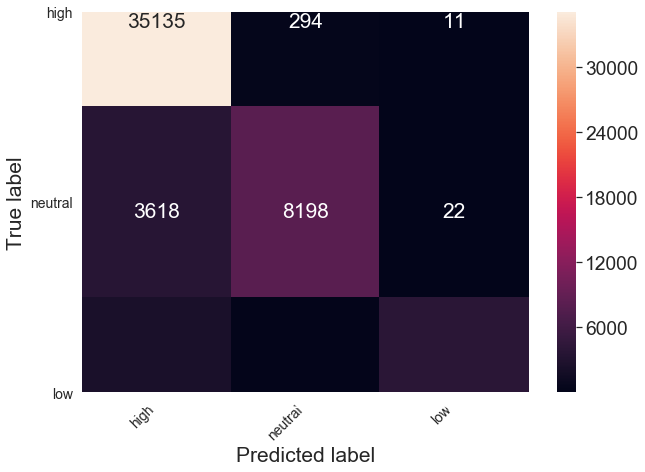

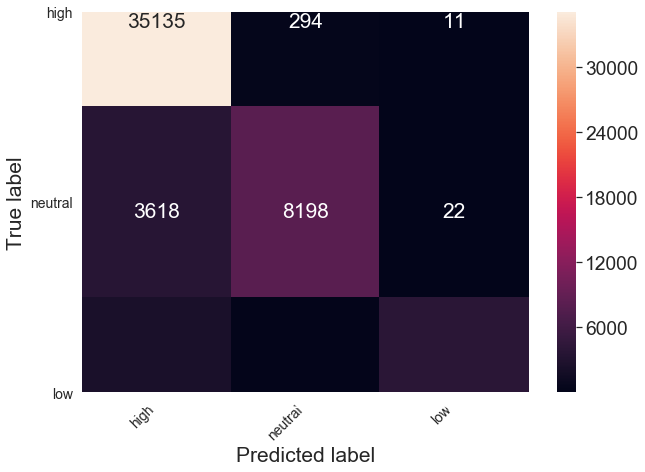

In [174]:
print_confusion_matrix(rfcm,list(df_test['label'].unique()) , figsize = (10,7), fontsize=14)

### Gradient Boosting

In [99]:
N_ESTIMATORS = 10
gb = GradientBoostingClassifier(learning_rate=0.01, 
                                   n_estimators=N_ESTIMATORS, 
                                   min_samples_leaf=10)
gb.fit(X_train,Y_train)
gb.pred = gb.predict(X_test)
print(gb.score(X_test, Y_test)) ##0.6591526243350817

0.6591526243350817


### Logistic Rgression

In [100]:
lg = LogisticRegression()
lg.fit(X_train,Y_train)
lg.pred = lg.predict(X_test)
print(lg.score(X_test, Y_test))

### 0.7715656734739427

/Volumes/Disk2/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/Disk2/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7715656734739427


In [ ]:
### Support Vector machines

In [105]:
df_train

,drugName,condition,review,rating,date,usefulCount,label
206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,high
95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,high
92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,neutral
138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,high
35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,high
155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2.0,"November 28, 2015",43,low
165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1.0,"March 7, 2017",5,low
102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10.0,"March 14, 2015",32,high
74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1.0,"August 9, 2016",11,low
48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8.0,"December 8, 2016",1,high


### Using Multinomial Naves Baies

In [184]:


from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb =  MultinomialNB()
nb.fit(X_train, Y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.7039392924896775
              precision    recall  f1-score   support

        high       0.70      0.99      0.82     35440
         low       0.80      0.23      0.35     11838
     neutral       0.53      0.00      0.00      6488

    accuracy                           0.70     53766
   macro avg       0.68      0.41      0.39     53766
weighted avg       0.70      0.70      0.62     53766

